In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from scipy import stats

## Notebook description
This notebook pre-processes LC-MS data for plotting. The data comes as atomwise fraction 13C, but we want it as fraction 12C since 12C comes from the inorganic pool. We then infer the fraction of intracellular inorganic carbon that is 12C by comparing labeling of arginine and glutamate (as described in the Methods). Using assumptions detailed in the Methods, we can then infer the fraction of 3PG production flux due to rubisco in each sample from the labeling patterns of serine in the experiment and controls. 

In [2]:
# Load amino acid LCMS data
float_types = ['ser', 'his', 'val', 'thr', 'pro', 'arg', 'glu']
short_names = float_types
long_names = ['Serine', 'Histidine', 'Valine', 'Threonine', 'Proline', 'Arginine', 'Glutamate']
dtypes = dict((aa, pd.np.float64) for aa in float_types)

# Note: this is a repeat measurement of earlier data that is also included in the repository. The underlying 
# samples are the same but we used about 3x more cell mass input because counts had been low for some samples
# in the earlier measurement. The measurement was also repeated in order to perform multiple reaction
# monitoring of the fragmentation of the serine +2 isotopologue. 
fname = 'data/LCMS/062220_repeat2_f13c_extracted_transpose.csv'

# Data is the fraction of C atoms that are 13C
frac13c_df = pd.read_csv(fname, index_col=0, na_values='NAN', dtype=dtypes)

# Convert data to fraction 12C from fraction 13C
frac12c_df = frac13c_df.copy()
frac12c_df[float_types] = 1.0 - frac13c_df[float_types]

# Serine and valine are products of lower glycolysis, so they are good
# proxies for 3PG labeling in the control. His is produced from ribose
# with the addition of a single C1 unit (1/6) carbons from THF.
# The remaining measured AAs are in some way connected to the TCA cycle and
# anaplerotic inorganic carbon incorporation, so they are bad proxies for the input carbon. 
representative_aas = ['ser', 'val', 'his']

for aa in representative_aas:
    for sn in ['CAfree_bioreactor', 'CCMB1_bioreactor']:
        mask = frac12c_df.sample_name == sn
        vals = frac12c_df[mask][aa].values
        
        # Drop zeros
        pct_vals = vals[vals>0]*100
        mean_std_12c = np.mean(pct_vals), np.std(pct_vals)
        print(sn, aa, 'mean 12C labeling: %.2f%% +/- %.1f%%' % mean_std_12c)
    print()

# Take a look at the underlying data to make sure.
frac12c_df.to_csv('data/LCMS/062220_f12c_inferred.csv')
mask = frac12c_df.sample_name.isin(['CAfree_bioreactor', 'CCMB1_bioreactor'])
frac13c_df

CAfree_bioreactor ser mean 12C labeling: 0.67% +/- 0.0%
CCMB1_bioreactor ser mean 12C labeling: 2.16% +/- 0.6%

CAfree_bioreactor val mean 12C labeling: 0.74% +/- 0.0%
CCMB1_bioreactor val mean 12C labeling: 3.36% +/- 2.7%

CAfree_bioreactor his mean 12C labeling: 0.67% +/- 0.2%
CCMB1_bioreactor his mean 12C labeling: 3.61% +/- 1.6%



<ipython-input-2-af5911018112>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  dtypes = dict((aa, pd.np.float64) for aa in float_types)


,ser,his,val,thr,pro,arg,glu,sample_name,description
sample,,,,,,,,,
AF 1,0.993012,0.996269,0.992377,0.959409,0.948631,0.929029,0.960876,CAfree_bioreactor,"Control ambient air, bioreactor - CAfree:pFE-s..."
AF 2,0.993279,0.993070,0.992382,0.960480,0.947130,0.927408,0.954005,CAfree_bioreactor,"Control ambient air, bioreactor - CAfree:pFE-s..."
AF 3,0.993434,0.990183,0.993438,0.959988,0.953622,0.925855,0.949893,CAfree_bioreactor,"Control ambient air, bioreactor - CAfree:pFE-s..."
AF 4,0.993479,0.993791,0.992332,0.938930,0.942675,0.926680,0.959270,CAfree_bioreactor,"Control ambient air, bioreactor - CAfree:pFE-s..."
AF 5,0.983807,0.971023,0.983629,0.957774,0.958482,0.891947,0.970512,CCMB1_bioreactor,Experiment ambient air bioreactor - CCMB1:pCB'...
AF 6,0.971412,0.941823,0.972140,0.924698,0.931796,0.824865,0.950898,CCMB1_bioreactor,Experiment ambient air bioreactor - CCMB1:pCB'...
AF 7,0.972681,0.957104,0.921617,0.889837,0.921748,0.809620,0.942496,CCMB1_bioreactor,Experiment ambient air bioreactor - CCMB1:pCB'...
AF 8,0.985718,0.985713,0.988252,0.959540,0.971684,0.911513,0.976156,CCMB1_bioreactor,Experiment ambient air bioreactor - CCMB1:pCB'...
100% 13C biomass,0.989901,0.972911,0.991141,0.980710,0.980234,0.963422,0.971596,100% 13C biomass,100% 13C biomass


In [3]:
# Calculate the intracellular 13C and 12C fractions by comparing arginine with glutamate and proline.
f13c_cyto_glu = 6 * frac13c_df.arg - 5 * frac13c_df.glu
f13c_cyto_pro = 6 * frac13c_df.arg - 5 * frac13c_df.pro
# We will use the mean of glu and proline inferences to get an estimate as in Gleizer et al. 2019.
mean_f13c_ctypo = (f13c_cyto_glu + f13c_cyto_pro) / 2

# Summary dataframe for saving and checking the calculation
df_data = {'sample_name': frac13c_df.sample_name, 
           'f13c_cyto_glu': f13c_cyto_glu, 
           'f13c_cyto_pro': f13c_cyto_pro,
           'f13c_cyto': mean_f13c_ctypo}
cyto_ci_isotopes_df = pd.DataFrame(df_data)

# Get fraction 12C by mass balance and convert into percent for later use. 
cyto_ci_isotopes_df['f12c_cyto_inferred'] = 1.0 - cyto_ci_isotopes_df.f13c_cyto
cyto_ci_isotopes_df['pct12c_cyto_inferred'] = 100*cyto_ci_isotopes_df.f12c_cyto_inferred

# Save and peek at the results
cyto_ci_isotopes_df.to_csv('data/LCMS/062220_f12co2_inferred.csv')
cyto_ci_isotopes_df

,sample_name,f13c_cyto_glu,f13c_cyto_pro,f13c_cyto,f12c_cyto_inferred,pct12c_cyto_inferred
sample,,,,,,
AF 1,CAfree_bioreactor,0.769793,0.831018,0.800406,0.199594,19.959432
AF 2,CAfree_bioreactor,0.794423,0.828794,0.811609,0.188391,18.839111
AF 3,CAfree_bioreactor,0.805670,0.787021,0.796345,0.203655,20.365468
AF 4,CAfree_bioreactor,0.763731,0.846705,0.805218,0.194782,19.478209
AF 5,CCMB1_bioreactor,0.499122,0.559272,0.529197,0.470803,47.080289
AF 6,CCMB1_bioreactor,0.194698,0.290211,0.242454,0.757546,75.754559
AF 7,CCMB1_bioreactor,0.145237,0.248975,0.197106,0.802894,80.289415
AF 8,CCMB1_bioreactor,0.588297,0.610655,0.599476,0.400524,40.052392
100% 13C biomass,100% 13C biomass,0.922556,0.879366,0.900961,0.099039,9.903894


In [4]:
# Print out some summary stats for our inferrences above.
# Calculate the mean f12c for the controls for reporting in the text
mean_isotope_df = cyto_ci_isotopes_df.groupby('sample_name').mean()
std_isotope_df = cyto_ci_isotopes_df.groupby('sample_name').std()

# Control is CAfree strain complemented by human CAII (Methods).
mean_control_f12c_cyto = mean_isotope_df.loc['CAfree_bioreactor'].f12c_cyto_inferred
std_control_f12c_cyto = std_isotope_df.loc['CAfree_bioreactor'].f12c_cyto_inferred

mean_exp_f12c_cyto = mean_isotope_df.loc['CCMB1_bioreactor'].f12c_cyto_inferred
std_exp_f12c_cyto = std_isotope_df.loc['CCMB1_bioreactor'].f12c_cyto_inferred

print('Average control has %.1f%% +/- %.1f%% 12C in the cytosol' % (
    100*mean_control_f12c_cyto, 100*std_control_f12c_cyto))
print('Average experiment has %.1f%% +/- %.1f%% 12C in the cytosol' % (
    100*mean_exp_f12c_cyto, 100*std_exp_f12c_cyto))

# Now we ask: what fraction of that 12C makes it onto serine in the control. 
mean_AA_labeling_df = frac12c_df.groupby('sample_name').mean()
mean_control_f12c_ser = mean_AA_labeling_df.loc['CAfree_bioreactor'].ser
baseline_12c_cycling_ser = mean_control_f12c_cyto / mean_control_f12c_ser
print('Control has an average of %.1f%% 12C on serine' % (100*mean_control_f12c_ser))
print('This is 1/%.1f of the cytosolic 12C pool' % (baseline_12c_cycling_ser))

Average control has 19.7% +/- 0.7% 12C in the cytosol
Average experiment has 60.8% +/- 20.2% 12C in the cytosol
Control has an average of 0.7% 12C on serine
This is 1/29.3 of the cytosolic 12C pool


In [5]:
# Now we infer the fraction of 3PG production flux that is due to rubisco.
# Assumptions:
# 1. DHAP has ≈0.6% 12C labeling in both exp and control.
#    a. Same becuse it is a direct product of glycerol -> DHAP -> 3PG -> serine.
#    b. 0.6% estimated from the labeling of serine and valine in the control.
# 2. RuBP has ≈0.6% 12C labeling in the experiment
#       estimated from serine, valine and histidine in the control.
# 3. Rubisco carboxylates from a pool with the 12C composition calculated from arg/glu comparison above. 
#       This fraction is inferred on a per-sample basis. 
f12c_dhap_assumed = mean_control_f12c_ser   # exp and control, assumed 0.6% see above
f12c_rubp_assumed = f12c_dhap_assumed       # only exp makes rubp
rel_rub_flux = frac12c_df.ser - f12c_dhap_assumed
rel_rub_flux /= (((f12c_dhap_assumed * 5 + cyto_ci_isotopes_df.f12c_cyto_inferred)/6)
                 - f12c_dhap_assumed)
mean_rub_3pg_production = rel_rub_flux[frac12c_df.sample_name == 'CCMB1_bioreactor'].mean()
print()
print('Mean inferred 3pg production flux fraction due to rubisco: %.1f%%' % (
    mean_rub_3pg_production*100))

# Make a dataframe with all the relevant data for plotting. 
df_data = dict(sample_name=frac12c_df.sample_name,
               ser_f12c=frac12c_df.ser,
               val_f12c=frac12c_df.val,
               his_f12c=frac12c_df.his,
               rel_rubisco_3PG_flux=rel_rub_flux,
               f12co2_inferred=cyto_ci_isotopes_df.f12c_cyto_inferred,
               description=frac12c_df.description)
summary_df = pd.DataFrame(df_data)

# The "relative rubisco flux" is meaningless for samples not expressing rubisco.
# Set those all to NAN
mask = np.logical_not(summary_df.sample_name.str.startswith('CCMB1'))
summary_df.loc[mask, 'rel_rubisco_3PG_flux'] = np.NaN
summary_df.to_csv('data/LCMS/062220_flux_inferrence.csv')


Mean inferred 3pg production flux fraction due to rubisco: 14.2%


In [6]:
# Sampling for calculating 99% confidence interval on the 3PG flux due to rubisco.
control_f12ser = frac12c_df[frac12c_df.sample_name == 'CAfree_bioreactor'].ser.values
exp_f12ser = frac12c_df[frac12c_df.sample_name == 'CCMB1_bioreactor'].ser.values
f12co2_exp = cyto_ci_isotopes_df[cyto_ci_isotopes_df.sample_name == 'CCMB1_bioreactor'].f12c_cyto_inferred.values
shape = (int(1e5), 4)

# Assume f12 for DHAP follows distribution observed for serine in the control
f12c_dhap_samples = np.random.normal(loc=0.0062, scale=0.002, size=shape)

# RuBP and DHAP were assumed to have the same f12C. 
# Pessimistically assume that they are independent but have the same mean/stddev
# This will create more variation than setting them to the same values
f12c_rubp_exp_samples = np.random.normal(loc=0.0062, scale=0.001, size=shape)

# Using estimated f12co2 and f12ser distributions from the same experimental sample, as our
# model and basic intuition says they must be correlated (rubisco fixes CO2 into serine). 
# f12ser is a direct LC-MS measurement: assume 0.1% error 
f12c_ser_exp_samples = np.random.normal(loc=exp_f12ser, scale=0.001, size=shape)

# f12co2 is indirectly inferred from glutamate and arginine, assume larger 1% error.
f12co2_exp_samples = np.random.normal(loc=f12co2_exp, scale=0.05, size=shape)

rel_rub_flux_samples = f12c_ser_exp_samples -  f12c_dhap_samples
rel_rub_flux_samples /= (((f12c_dhap_samples*5 + f12co2_exp_samples)/6) - f12c_dhap_samples)
pct_rub_flux_samples = rel_rub_flux_samples*100

Inference of plausible range for rubisco fraction of 3PG production flux
Overall mean: 14.9%
Overall median: 15.2%
	 99% CI: 5.0-23.2%

Per-sample inference of rubisco flux range
Sample 0 median: 12.9%
	 99% CI: 5.4-22.4%
Sample 1 median: 17.9%
	 99% CI: 12.8-23.9%
Sample 2 median: 15.9%
	 99% CI: 11.2-21.4%
Sample 3 median: 12.3%
	 99% CI: 3.5-23.8%


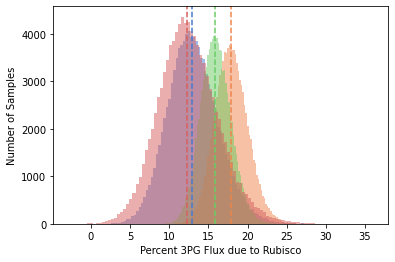

In [7]:
# Plot sampled distributions of rubisco flux for all four experimental samples.
plt.figure()
print('Inference of plausible range for rubisco fraction of 3PG production flux')
low, med, high = np.percentile(pct_rub_flux_samples.flatten(), [0.5, 50, 99.5])
mean_flux = np.mean(pct_rub_flux_samples.flatten())
print('Overall mean: %.1f%%' % mean_flux)
print('Overall median: %.1f%%' % med)
print('\t 99%% CI: %.1f-%.1f%%' % (low, high))
print()
print('Per-sample inference of rubisco flux range')
pal = sns.color_palette('muted')
for c in range(4):
    plt.hist(pct_rub_flux_samples[:, c], bins=100, alpha=0.5, color=pal[c])
    low, med, high = np.percentile(pct_rub_flux_samples[:, c], [0.5, 50, 99.5])
    plt.axvline(med, ls='--', color=pal[c])
    print('Sample %d median: %.1f%%' % (c, med))
    print('\t 99%% CI: %.1f-%.1f%%' % (low, high))
    
plt.xlabel('Percent 3PG Flux due to Rubisco')
plt.ylabel('Number of Samples')
plt.show()